In [1]:
import numpy as np
import matplotlib.pyplot as plt
from brian2 import nA, pA, amp, ms, us, SpikeMonitor, StateMonitor, SpikeGeneratorGroup
from teili import TeiliNetwork
from teili.core.groups import Neurons, Connections
from teili.models.neuron_models import DPI
from teili.models.synapse_models import DPISyn

In [2]:
time_stim = 100*ms
num_spikes = 100
freq = num_spikes/time_stim
indices =[0 for i in range(num_spikes)]
times = [(i+1)*(1/freq) for i in range(num_spikes)]

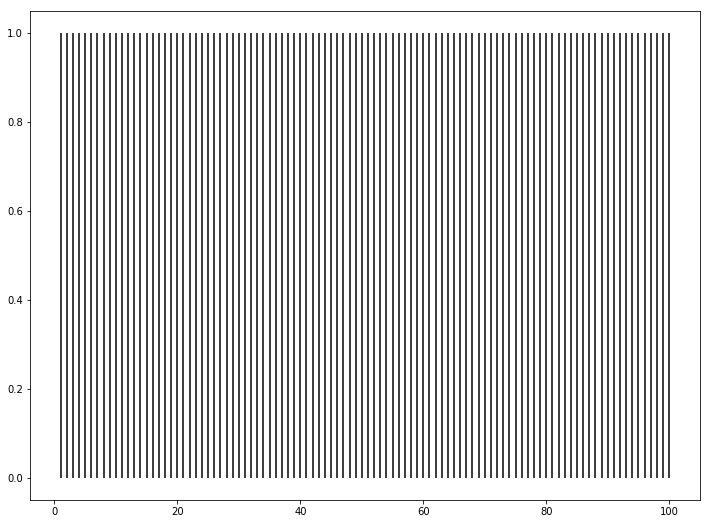

In [3]:
plt.figure(figsize=(12, 9))
plt.vlines(times/ms, ymin=0.0, ymax=1.0)

In [4]:
generator = SpikeGeneratorGroup(1, indices, times, name='generator')

In [5]:
N = 10
neurons = Neurons(N, equation_builder=DPI(num_inputs=2), refractory=0.0*ms, name='neurons')
neurons.Iahp = 0.5*pA
neurons.Ispkthr = [(i+1)*0.4*nA for i in range(N)]

In [6]:
synapses = Connections(generator, neurons, equation_builder=DPISyn(), method='euler', name='synapses')
synapses.connect(i=0, j=[i for i in range(N)])
synapses.weight = 500

In [7]:
spike_monitor = SpikeMonitor(neurons, name='spike_monitor')
state_monitor = StateMonitor(neurons, ['Imem'], name='state_monitor', record=True)

In [8]:
network = TeiliNetwork()
network.add([generator, neurons, synapses, spike_monitor, state_monitor])

In [9]:
network.run(time_stim)

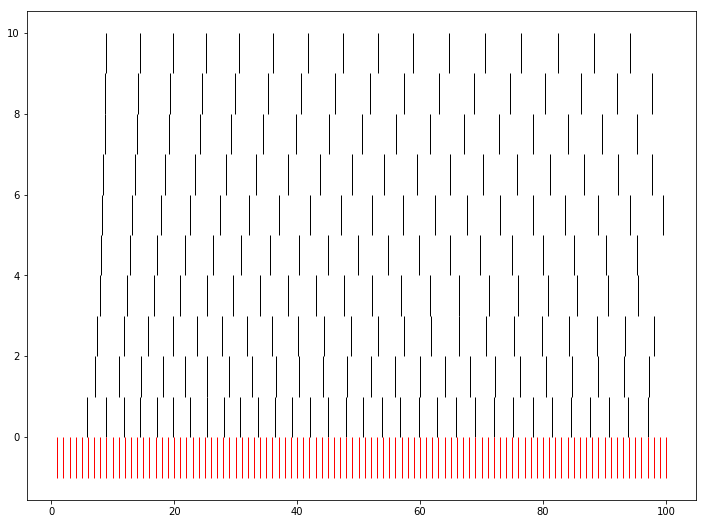

In [10]:
plt.figure(figsize=(12, 9))
for n in range(N):
    idx = spike_monitor.i==n
    plt.vlines(spike_monitor.t[idx]/ms, ymin=n, ymax=n+1, linewidth=1)
plt.vlines(times/ms, ymin=-1.0, ymax=0.0, color='red', linewidth=1)